# Multi-Dimensional Scaling

Nice overview of many aspect of MDS from [Geeksforgeeks](https://www.geeksforgeeks.org/sklearn-multi-dimensional-scaling-mds-python-implementation-from-scratch/).

May also try PCA and t-SNE. See quick comparison [here](https://www.geeksforgeeks.org/multidimensional-scaling-mds-using-scikit-learn/).


In [58]:
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import pandas as pd

In [72]:
df_original = pd.DataFrame(np.random.randn(20,5))

In [73]:
mds = MDS(n_components=2, metric=True, max_iter=3000, eps=1e-10, random_state=0) 
nmds = MDS(n_components=2, metric=False, max_iter=3000, eps=1e-10, random_state=0) 
df_mds = pd.DataFrame(mds.fit_transform(df_original))
df_nmds = pd.DataFrame(nmds.fit_transform(df_original))

In [74]:
print(mds.stress_, nmds.stress_)

93.21197048889864 7.166127862765637


<AxesSubplot:xlabel='0', ylabel='1'>

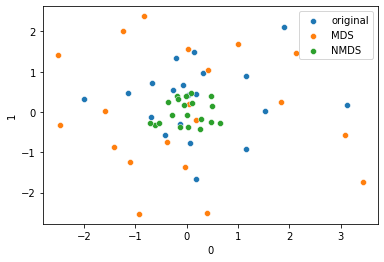

In [75]:
axs = sn.scatterplot(x=df_original.iloc[:,0], y=df_original.iloc[:,1], label='original')
sn.scatterplot(x=df_mds.iloc[:,0], y=df_mds.iloc[:,1], label='MDS', ax=axs)
sn.scatterplot(x=df_nmds.iloc[:,0], y=df_nmds.iloc[:,1], label='NMDS', ax=axs)